## In this program, our objective will be the binary classification in HR process

Collect Data: It can be found in Kaggle - https://www.kaggle.com/datasets/shaheerzubairi/recruitment-dataset

In [1660]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

In [1661]:
import warnings


warnings.filterwarnings('ignore')



In [1662]:
PATH_DATA = os.path.join(r'C:\Users\caioe\OneDrive\Área de Trabalho\HR - recruitment')


Main Features

In [1663]:
df = pd.read_csv(os.path.join(PATH_DATA, "recruitment_mydata.csv"))

2. EDA

Understand your data: Visualize the distribution of workers' features, investigate outliers, and look for missing data.

In [1664]:
df.head(50)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26.0,Female,Bachelor's (Type 2),0.0,3,26.783828,48.0,78.0,91.0,Aggressive,1
1,39.0,Female,PhD,12.0,3,25.862694,35.0,68.0,80.0,Moderate,1
2,48.0,Male,Bachelor's (Type 2),3.0,2,9.920805,20.0,67.0,13.0,Moderate,0
3,34.0,Female,Bachelor's (Type 2),5.0,2,6.407751,36.0,27.0,70.0,Conservative,0
4,30.0,Male,Bachelor's (Type 1),6.0,1,43.105343,23.0,52.0,85.0,Moderate,0
5,27.0,Male,Master's,14.0,4,31.706659,54.0,50.0,50.0,Aggressive,1
6,48.0,Male,Bachelor's (Type 2),6.0,1,17.291229,24.0,52.0,64.0,Conservative,0
7,40.0,Male,PhD,13.0,3,10.586811,6.0,3.0,92.0,Conservative,0
8,26.0,Female,Master's,6.0,5,28.774864,80.0,78.0,51.0,Aggressive,1
9,45.0,Female,Bachelor's (Type 2),2.0,5,30.195964,92.0,16.0,94.0,Conservative,0


In [1665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1499 non-null   float64
 1   Gender               1500 non-null   object 
 2   EducationLevel       1499 non-null   object 
 3   ExperienceYears      1499 non-null   float64
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1499 non-null   float64
 7   SkillScore           1499 non-null   float64
 8   PersonalityScore     1499 non-null   float64
 9   RecruitmentStrategy  1499 non-null   object 
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 129.0+ KB


In [1666]:
df.describe()

,Age,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision
count,1499.000000,1499.000000,1500.00000,1500.000000,1499.000000,1499.000000,1499.000000,1500.000000
mean,35.140761,7.693129,3.00200,25.505379,50.585724,51.124750,49.374249,0.310000
std,9.250746,4.642840,1.41067,14.567151,28.623398,29.361402,29.358621,0.462647
min,20.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,0.000000
25%,27.000000,4.000000,2.00000,12.838851,25.000000,25.500000,23.000000,0.000000
50%,35.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,0.000000
75%,43.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,1.000000
max,50.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,1.000000


In [1667]:
df.isna().sum()

Age                    1
Gender                 0
EducationLevel         1
ExperienceYears        1
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         1
SkillScore             1
PersonalityScore       1
RecruitmentStrategy    1
HiringDecision         0
dtype: int64

In [1668]:
for column in df.columns:
    print(f"Unique Values of '{column}':")
    print(df[column].unique())
    print()

Unique Values of 'Age':
[26. 39. 48. 34. 30. 27. 40. 45. 38. 42. 43. 23. 22. 41. 21. 31. 49. 25.
 nan 20. 44. 36. 46. 50. 29. 47. 35. 24. 28. 37. 33. 32.]

Unique Values of 'Gender':
['Female' 'Male']

Unique Values of 'EducationLevel':
["Bachelor's (Type 2)" 'PhD' "Bachelor's (Type 1)" "Master's" nan]

Unique Values of 'ExperienceYears':
[ 0. 12.  3.  5.  6. 14. 13.  2. 15.  7.  1.  9.  8.  4. 11. 10. nan]

Unique Values of 'PreviousCompanies':
[3 2 1 4 5]

Unique Values of 'DistanceFromCompany':
[26.78382755 25.86269433  9.92080483 ...  4.28991089 36.2992633
 12.91047177]

Unique Values of 'InterviewScore':
[ 48.  35.  20.  36.  23.  54.  24.   6.  80.  92.  93.  70.  96.  10.
  72.  11.  34.  62.  67.  99.  91.  56.  12.  22.  82. 100.  38.  87.
  79.  33.  74.  30.  61.   1.  14.  28.  65.  15.  76.  43.  nan   7.
  40.  69.  60.  25.  18.  57.  29.  64.   5.  17.   9.  83.  51.  66.
  81.  77.  90.  16.  52.  85.   4.   3.  88.  32.  13.  55.  45.   2.
  78.  73.  21.  89.  26.  9

As there are few null values, all will be deleted

In [1669]:
df.dropna(inplace=True)


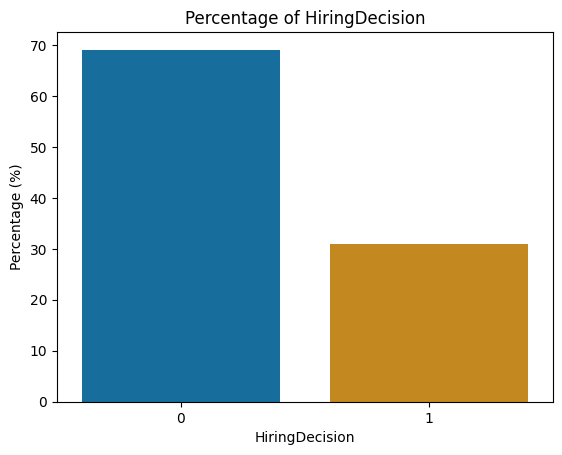

In [1670]:
for column in df:
    if column == 'HiringDecision':
        counts = df[column].value_counts(normalize=True) 
        percentages = counts * 100  

        
        percent_df = percentages.reset_index()
        percent_df.columns = [column, 'percentage']

        
        sns.barplot(data=percent_df, x=column, y='percentage', palette='colorblind')

        
        plt.ylabel('Percentage (%)')
        plt.title(f'Percentage of {column}')
        plt.show()

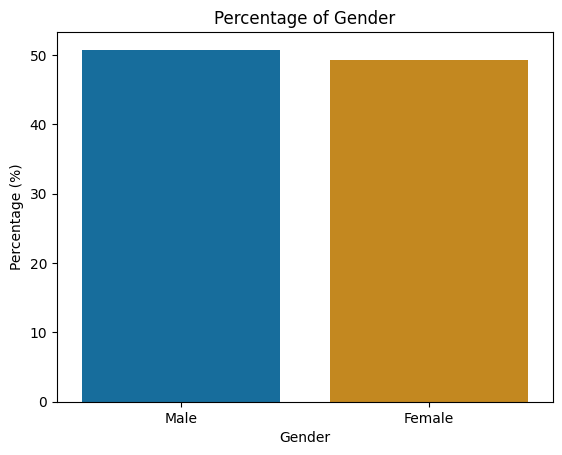

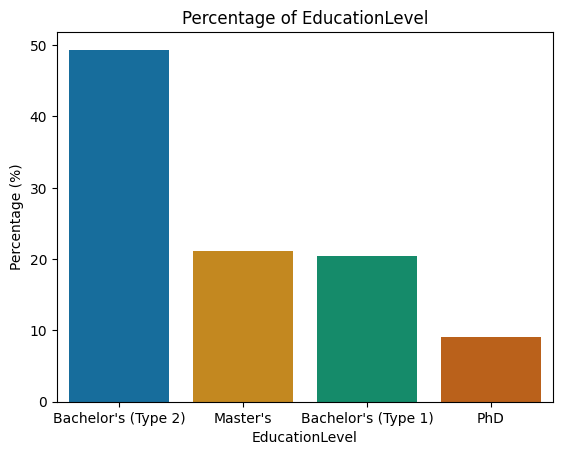

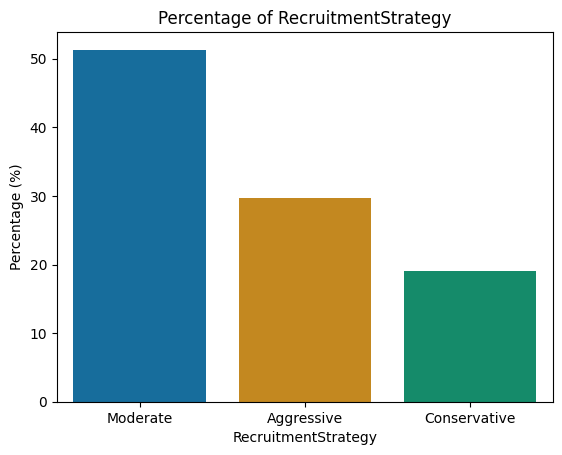

In [1671]:
for column in df:
    if df[column].dtype == 'object':
        counts = df[column].value_counts(normalize=True)  
        percentages = counts * 100  

        
        percent_df = percentages.reset_index()
        percent_df.columns = [column, 'percentage']

        
        sns.barplot(data=percent_df, x=column, y='percentage', palette='colorblind')

        
        plt.ylabel('Percentage (%)')
        plt.title(f'Percentage of {column}')
        plt.show()

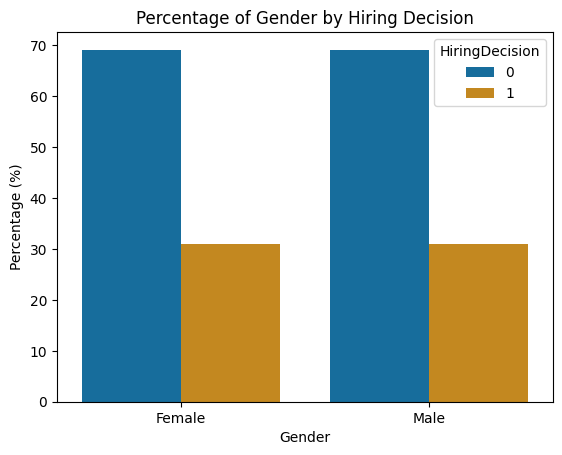

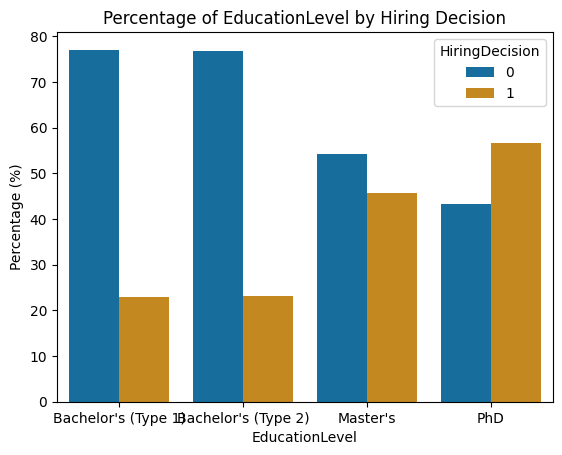

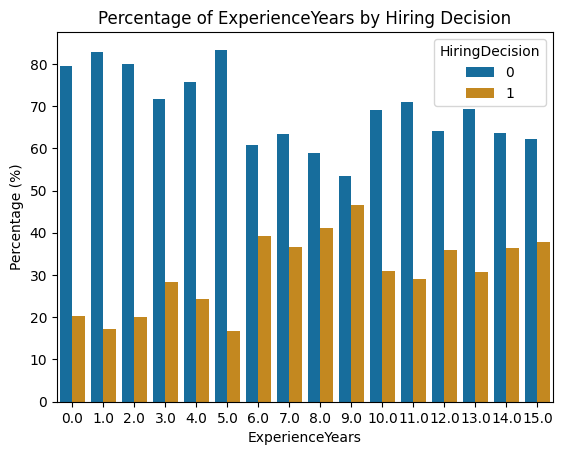

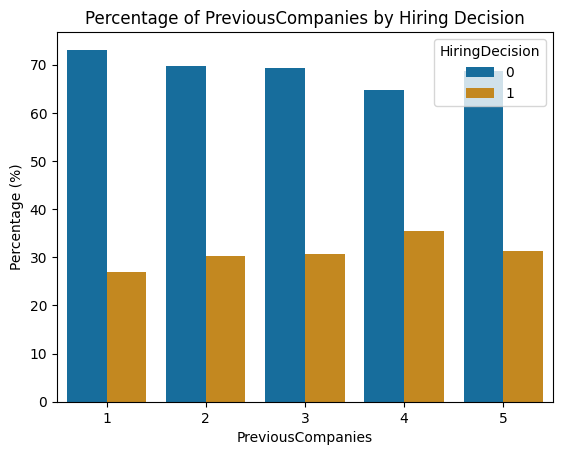

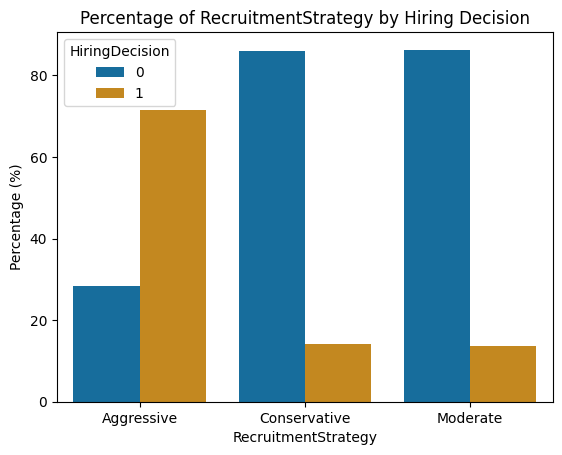

In [1672]:
for column in df:
    if df[column].dtype == 'object' or column == 'PreviousCompanies' or column =='ExperienceYears':
        
        counts = df.groupby([column, 'HiringDecision']).size().reset_index(name='counts')
        
       
        counts['percentage'] = counts['counts'] / counts.groupby(column)['counts'].transform('sum') * 100

        
        sns.barplot(data=counts, x=column, y='percentage', hue='HiringDecision', palette='colorblind')

        
        plt.ylabel('Percentage (%)')
        plt.title(f'Percentage of {column} by Hiring Decision')
        plt.show()


Analizing numeric features

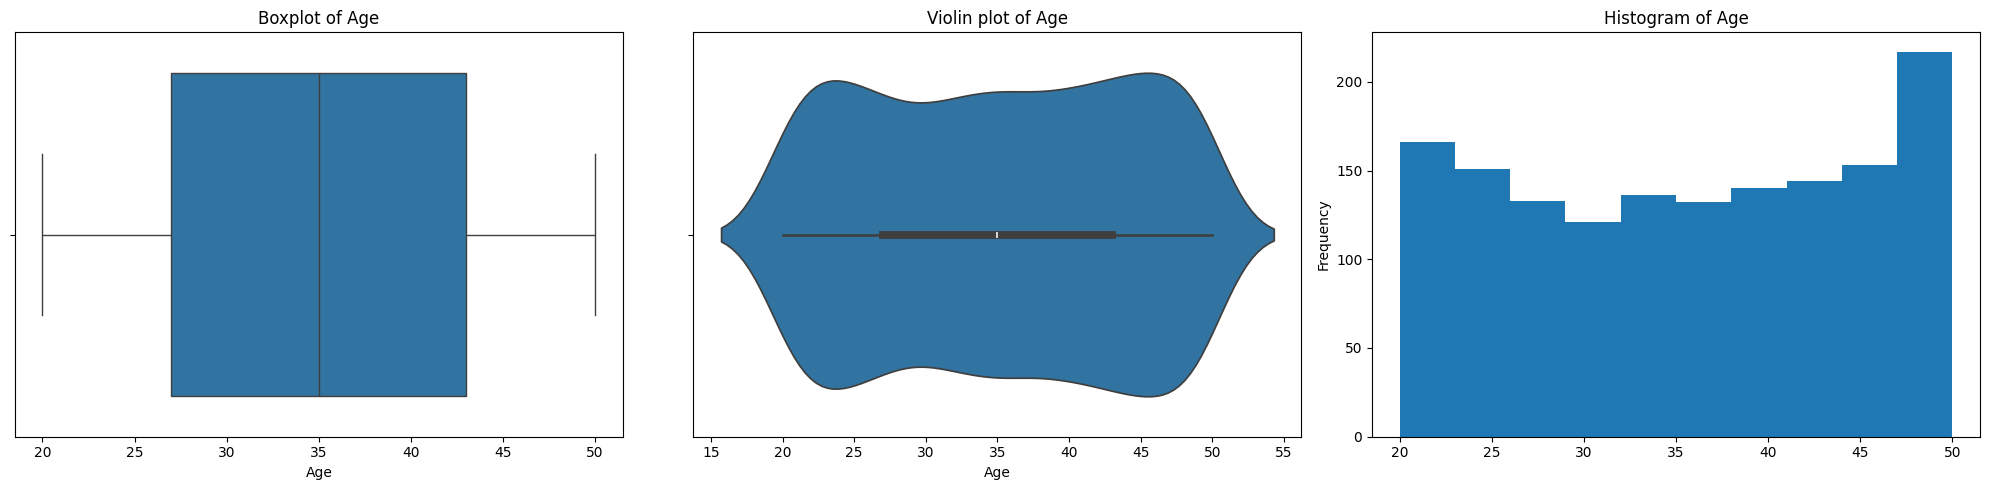

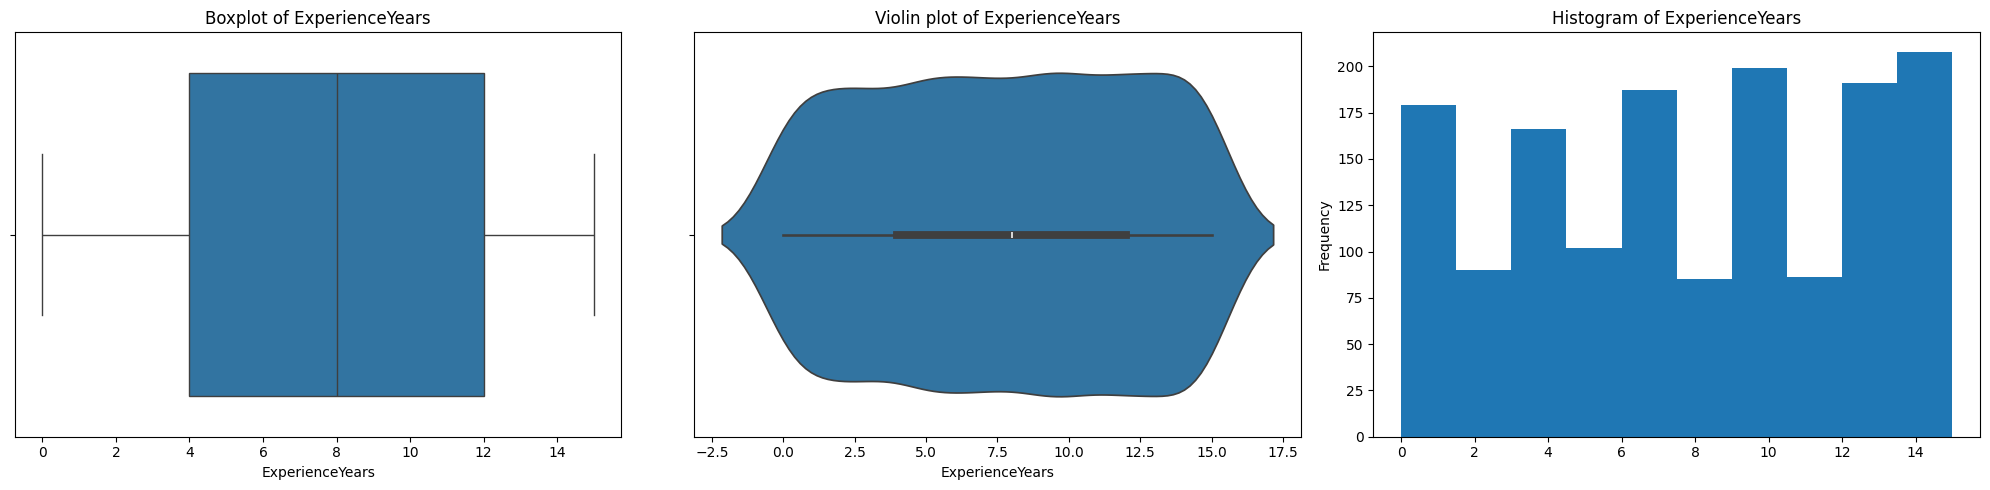

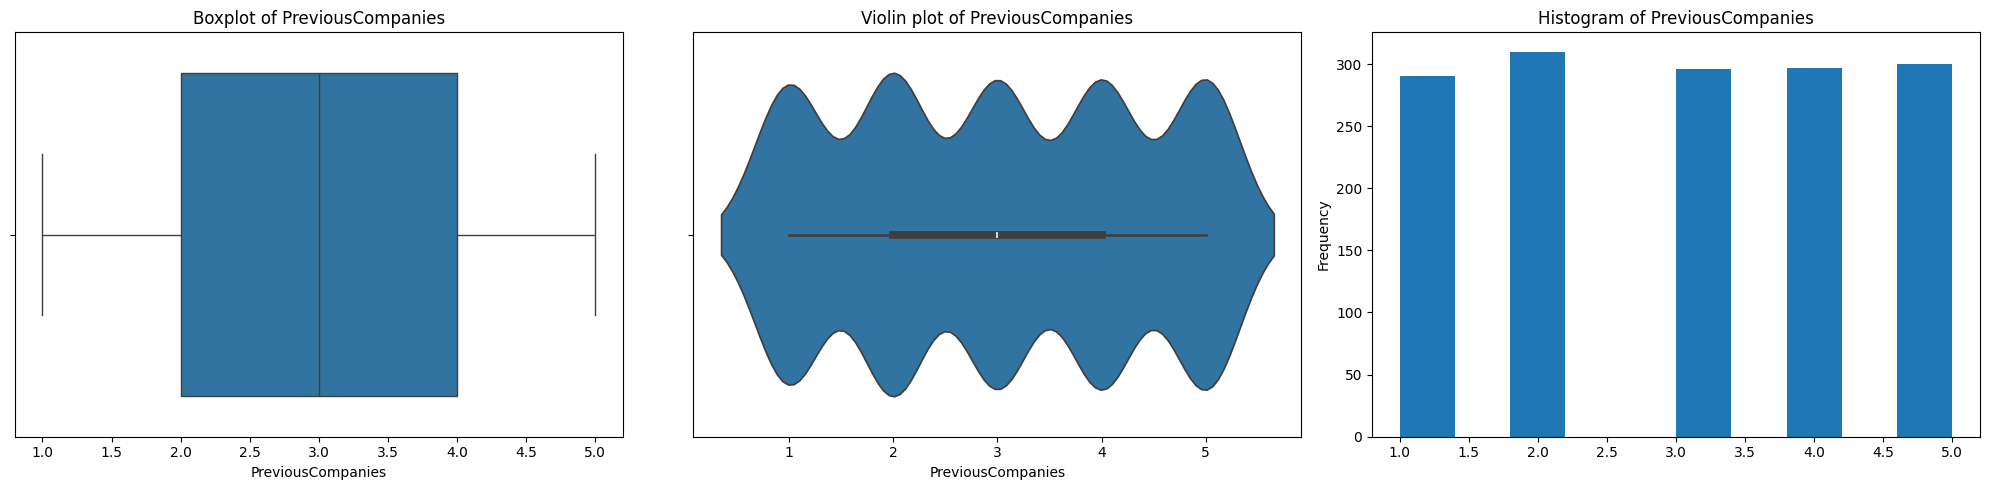

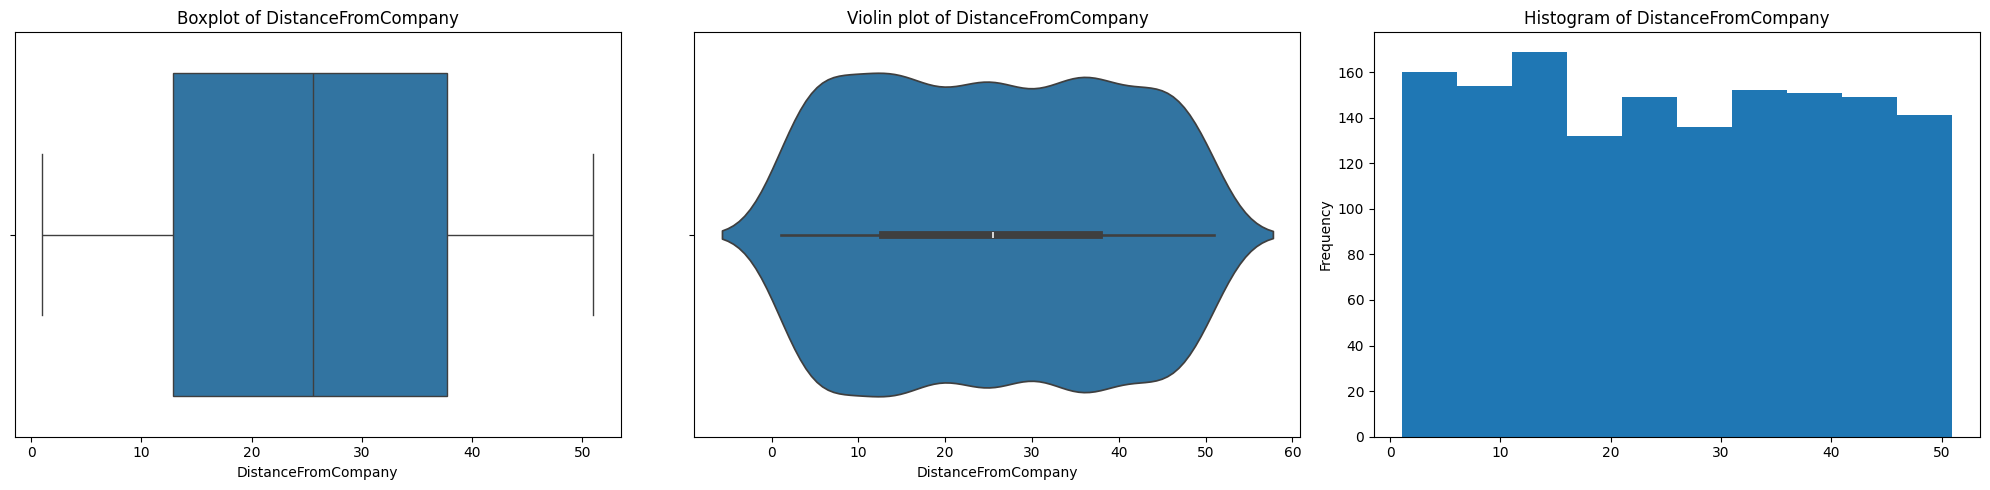

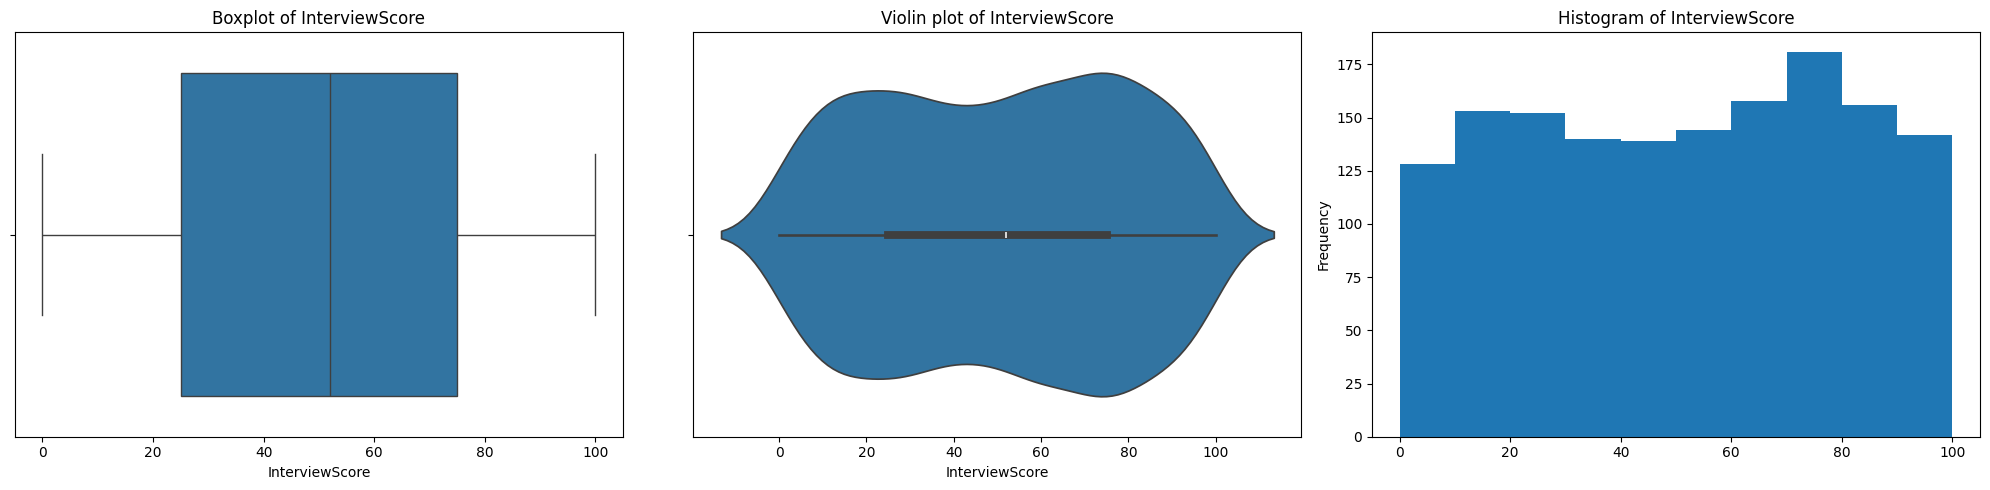

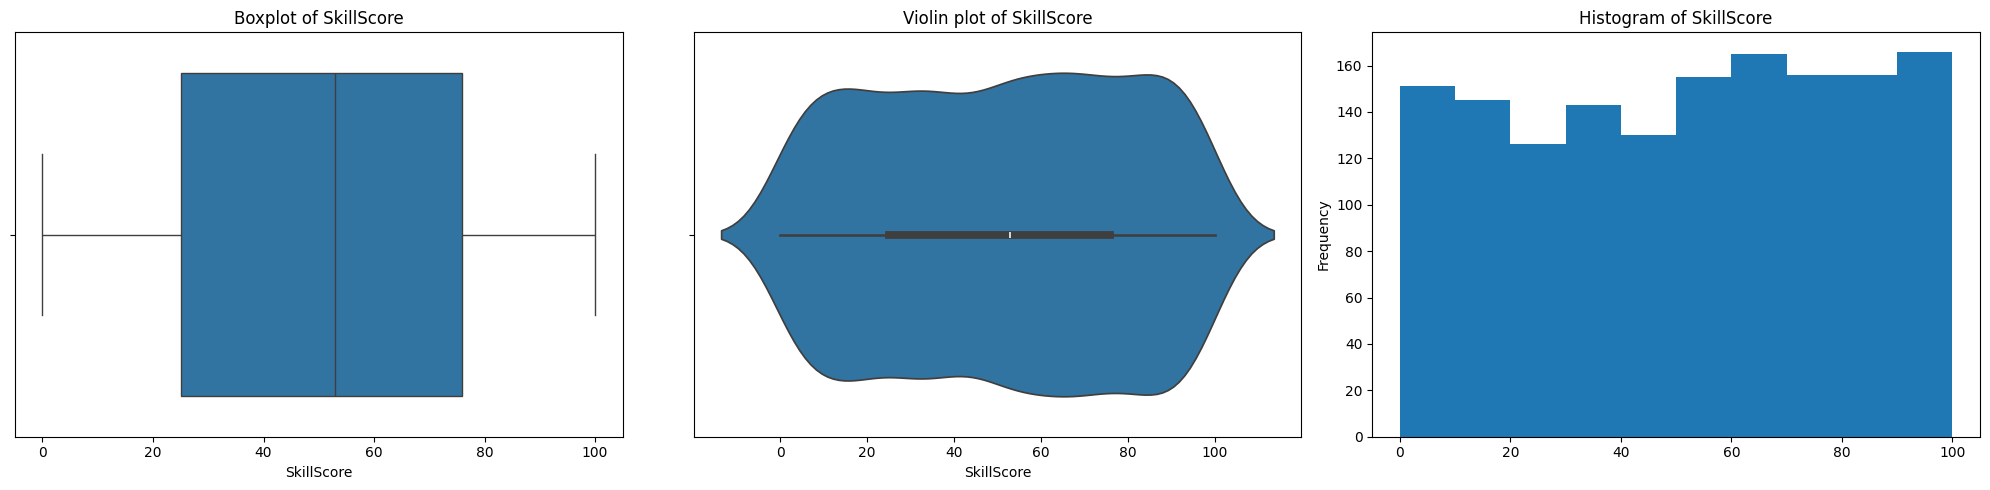

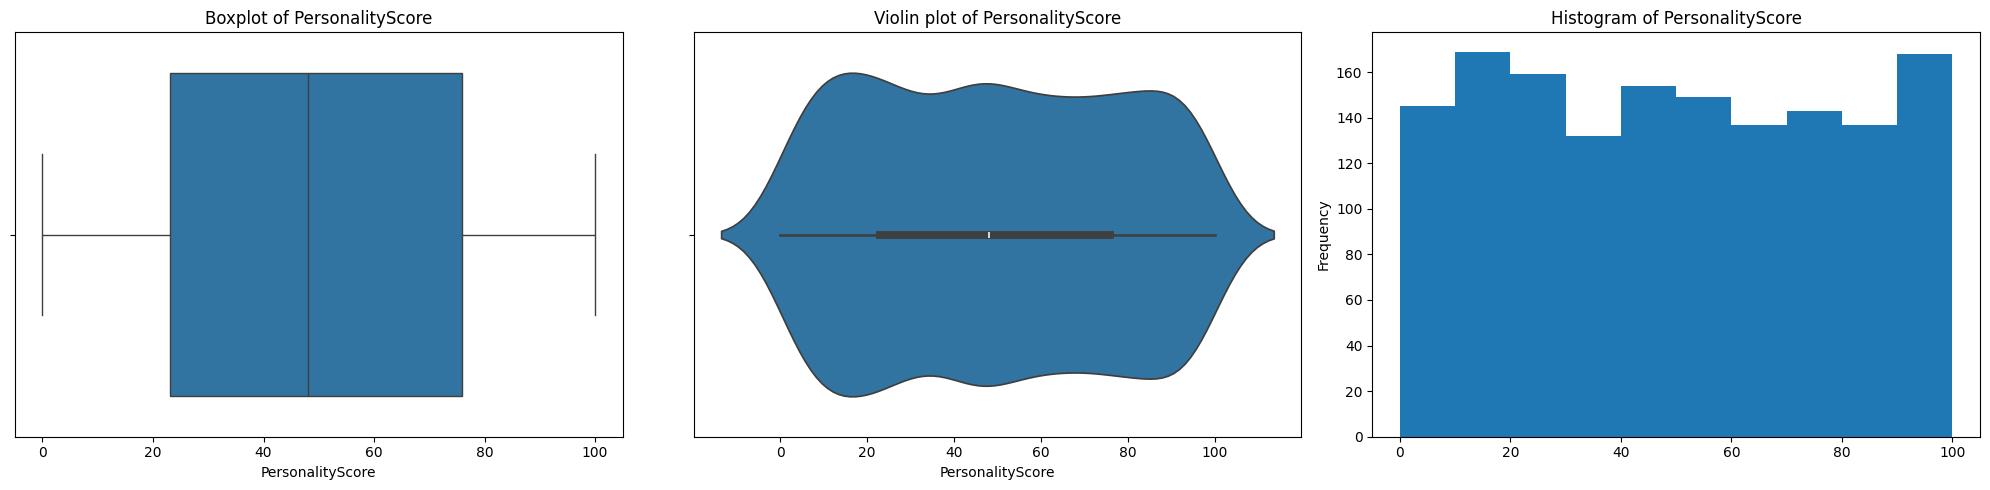

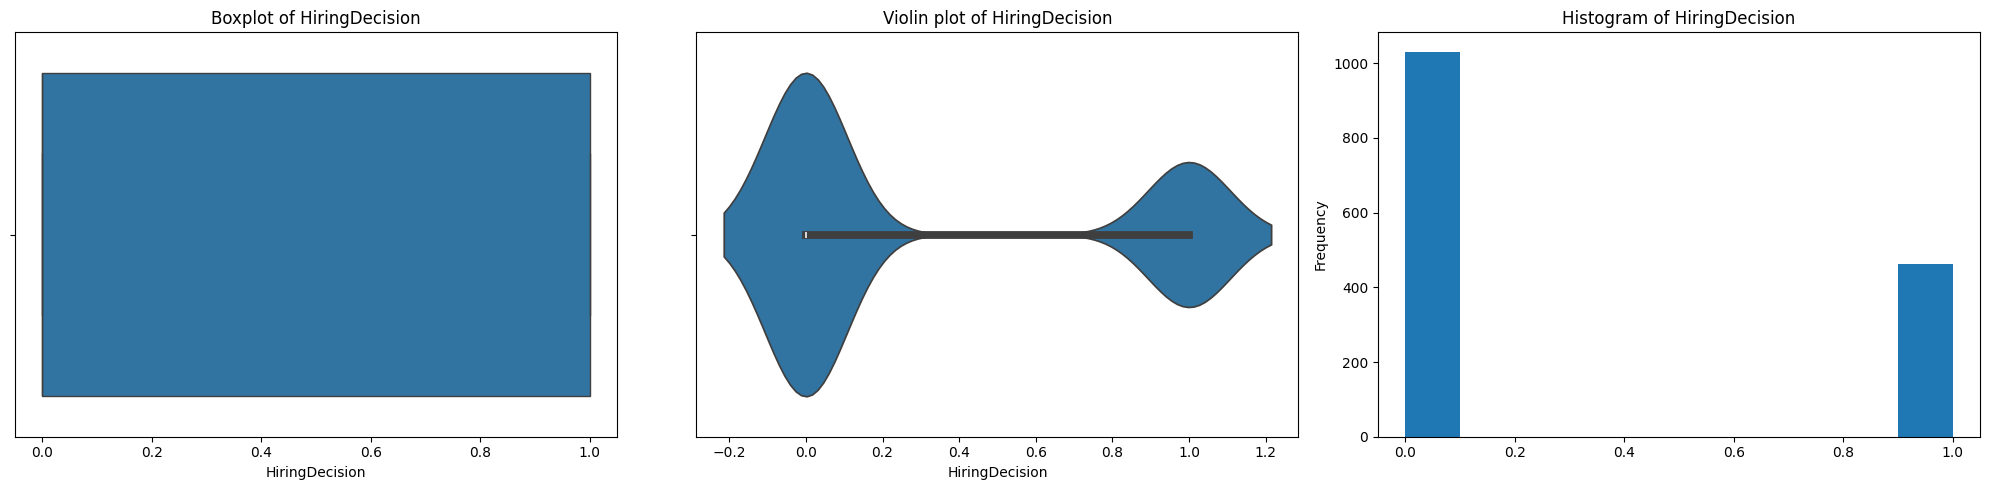

In [1673]:


for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):  
        
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))  
        
        
        sns.boxplot(data=df, x=column, ax=axes[0])
        axes[0].set_title(f'Boxplot of {column}')
        
        sns.violinplot(data=df, x=column, ax=axes[1])
        axes[1].set_title(f'Violin plot of {column}')
        
        
        df[column].plot.hist(ax=axes[2], bins=10)
        axes[2].set_title(f'Histogram of {column}')
        
        
        
        
        
        plt.tight_layout()  
        plt.show()



Removing outliers won't be really necesary. 

In [1674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1493 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1493 non-null   float64
 1   Gender               1493 non-null   object 
 2   EducationLevel       1493 non-null   object 
 3   ExperienceYears      1493 non-null   float64
 4   PreviousCompanies    1493 non-null   int64  
 5   DistanceFromCompany  1493 non-null   float64
 6   InterviewScore       1493 non-null   float64
 7   SkillScore           1493 non-null   float64
 8   PersonalityScore     1493 non-null   float64
 9   RecruitmentStrategy  1493 non-null   object 
 10  HiringDecision       1493 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 140.0+ KB


Useful Insights:

1) EducationLevel can be transformed by using Ordinal Encoding, but bachelor should be one type instead of 2, because there's no significative difference between both bachelor types.
2) Gender must be droped, there's no significant difference on hiring by gender.
3) RecruitmentStrategy can be divided into 2 categories: Aggresive and Non-Aggressive, due similarities above. And then, label encoding.
4) No outliers
5) Standard Scaler can be useful


In [1675]:
df.drop(columns = 'Gender', inplace = True)

In [1676]:
df['EducationLevel'] = df['EducationLevel'].apply(lambda x: 'Bachelor' if x.startswith("Bachelor's") else x)


In [1677]:
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].apply(lambda x: 1 if x == 'Aggressive' else 0)

In [1678]:
df = df.rename(columns={
    'RecruitmentStrategy': 'Aggressive',
    
})

In [1679]:
df['EducationLevel'].unique()

array(['Bachelor', 'PhD', "Master's"], dtype=object)

In [1680]:

order_categories = ['Bachelor', "Master's", 'PhD']


In [1681]:

encoder = OrdinalEncoder(categories=[order_categories])

# Aplicando o Ordinal Encoder ao DataFrame
df['EducationLevel'] = encoder.fit_transform(df[['EducationLevel']])




In [1682]:
df.head()

,Age,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,Aggressive,HiringDecision
0,26.0,0.0,0.0,3,26.783828,48.0,78.0,91.0,1,1
1,39.0,2.0,12.0,3,25.862694,35.0,68.0,80.0,0,1
2,48.0,0.0,3.0,2,9.920805,20.0,67.0,13.0,0,0
3,34.0,0.0,5.0,2,6.407751,36.0,27.0,70.0,0,0
4,30.0,0.0,6.0,1,43.105343,23.0,52.0,85.0,0,0


In [1683]:
def corr(df):
    df_corr = df
    correlation_matrix = df_corr.corr()
    plt.figure(figsize=(15, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    return plt.show()

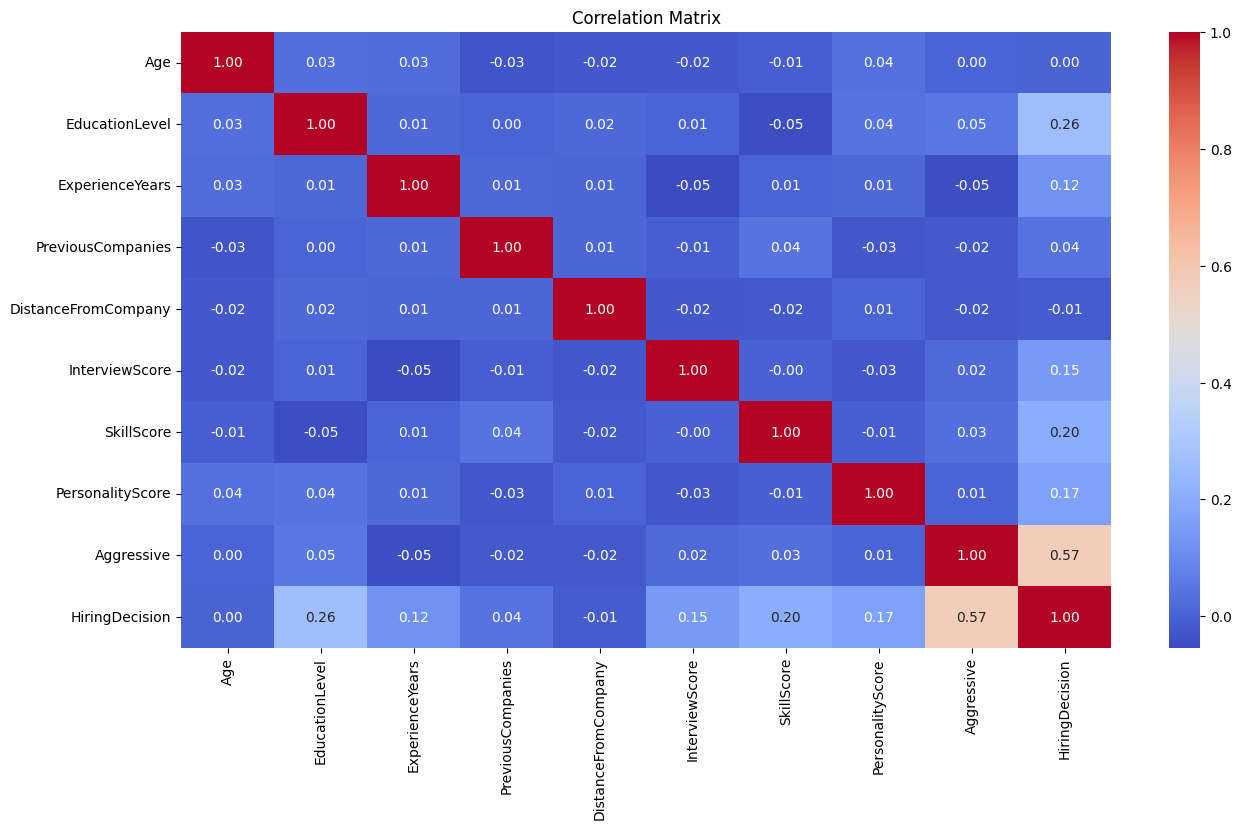

In [1684]:
corr(df)

As we don't have an strong correlation between features. As we have a lot of variables, it won't be plotted decision trees graph. 

Train-test

In [1685]:
X = df.drop(columns=['HiringDecision'])
y = df['HiringDecision']


In [1686]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Prediction test without balance

In [1687]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

def apply_sampling_and_classify(X_train, X_test, y_train, y_test, modelos_classificacao, method='none'):
    metricas = []

    if method == 'oversampling':
        oversample = RandomOverSampler(random_state=42)
        X_train, y_train = oversample.fit_resample(X_train, y_train)
    elif method == 'undersampling':
        undersample = RandomUnderSampler(random_state=42)
        X_train, y_train = undersample.fit_resample(X_train, y_train)
    elif method == 'smote':
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    for name, model in modelos_classificacao:
        # Pipeline para escalonamento e modelo
        pipeline = imbpipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        report_dict = classification_report(y_test, y_pred, output_dict=True)

        for class_name, metrics in report_dict.items():
            if class_name not in ['accuracy', 'macro avg', 'weighted avg']:  # Ignorar as médias
                metricas.append({
                    'Model': name,
                    'Class': class_name,
                    'Precision': metrics['precision'],
                    'Recall': metrics['recall'],
                    'F1-Score': metrics['f1-score'],
                    'Support': metrics['support'],
                    'Balanced': method.capitalize() if method != 'none' else 'No_Balance'
                })

    return pd.DataFrame(metricas)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelos_classificacao = [
    ('LogisticRegression', LogisticRegression(multi_class='multinomial', max_iter=1000)),
    ('RidgeClassifier', RidgeClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GaussianProcessClassifier', GaussianProcessClassifier()),
    ('LGBMClassifier', LGBMClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('ExtraTreesClassifier', ExtraTreesClassifier()),
    ('BaggingClassifier', BaggingClassifier())
]


metricas_imbalanced = apply_sampling_and_classify(X_train, X_test, y_train, y_test, modelos_classificacao, method='none')


metricas_oversampling = apply_sampling_and_classify(X_train, X_test, y_train, y_test, modelos_classificacao, method='oversampling')


metricas_undersampling = apply_sampling_and_classify(X_train, X_test, y_train, y_test, modelos_classificacao, method='undersampling')

metricas_smote = apply_sampling_and_classify(X_train, X_test, y_train, y_test, modelos_classificacao, method='smote')


metricas_df = pd.concat([metricas_imbalanced, metricas_oversampling, metricas_undersampling, metricas_smote])


print(metricas_df.head())


[LightGBM] [Info] Number of positive: 377, number of negative: 817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1194, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.315745 -> initscore=-0.773394
[LightGBM] [Info] Start training from score -0.773394
[LightGBM] [Info] Number of positive: 817, number of negative: 817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 377, number of negative: 377
[LightGBM] [In

In [1688]:
pd.set_option('display.max_rows', 200)

In [1689]:
metricas_df.head(150)

,Model,Class,Precision,Recall,F1-Score,Support,Balanced
0,LogisticRegression,0,0.907407,0.915888,0.911628,214.0,No_Balance
1,LogisticRegression,1,0.783133,0.764706,0.773810,85.0,No_Balance
2,RidgeClassifier,0,0.895455,0.920561,0.907834,214.0,No_Balance
3,RidgeClassifier,1,0.784810,0.729412,0.756098,85.0,No_Balance
4,DecisionTreeClassifier,0,0.919048,0.901869,0.910377,214.0,No_Balance
5,DecisionTreeClassifier,1,0.764045,0.800000,0.781609,85.0,No_Balance
6,RandomForestClassifier,0,0.945701,0.976636,0.960920,214.0,No_Balance
7,RandomForestClassifier,1,0.935897,0.858824,0.895706,85.0,No_Balance
8,GradientBoostingClassifier,0,0.958333,0.967290,0.962791,214.0,No_Balance
9,GradientBoostingClassifier,1,0.915663,0.894118,0.904762,85.0,No_Balance


F1-Score for balanced in avg.

In [1690]:
metricas_balanced_df = metricas_df[metricas_df['Balanced'] != 'No_Balance']

In [1691]:
metricas_balanced_df = metricas_balanced_df.groupby(['Balanced', 'Model'])['F1-Score'].mean()
metricas_balanced_df = pd.DataFrame(metricas_balanced_df)


In [1692]:
metricas_balanced_df.sort_values(by='F1-Score', ascending = False).head(100)

F1-Score
Balanced      Model                               
Oversampling  CatBoostClassifier          0.929380
Smote         GradientBoostingClassifier  0.924950
Oversampling  RandomForestClassifier      0.924385
              GradientBoostingClassifier  0.921642
              LGBMClassifier              0.917812
Smote         RandomForestClassifier      0.914006
              CatBoostClassifier          0.914006
              LGBMClassifier              0.906467
              XGBClassifier               0.902733
Undersampling CatBoostClassifier          0.902733
Oversampling  ExtraTreesClassifier        0.899179
              BaggingClassifier           0.895374
Undersampling RandomForestClassifier      0.895331
Oversampling  XGBClassifier               0.894627
Smote         ExtraTreesClassifier        0.893902
              BaggingClassifier           0.883255
Undersampling LGBMClassifier              0.879228
              ExtraTreesClassifier        0.874786
              BaggingClassifier           0.869271
Oversampling  GaussianProcessClassifier   0.859275
Smote         AdaBoostClassifier          0.856057
Undersampling XGBClassifier               0.855206
              GradientBoostingClassifier  0.851733
Smote         GaussianProcessClassifier   0.848990
Oversampling  AdaBoostClassifier          0.847379
Undersampling GaussianProcessClassifier   0.847022
              RidgeClassifier             0.833094
Oversampling  DecisionTreeClassifier      0.833094
              LogisticRegression          0.833094
Undersampling AdaBoostClassifier          0.829677
Smote         DecisionTreeClassifier      0.825940
Oversampling  RidgeClassifier             0.825146
Smote         RidgeClassifier             0.821562
Undersampling LogisticRegression          0.820519
              KNeighborsClassifier        0.819437
Smote         LogisticRegression          0.803839
              KNeighborsClassifier        0.796146
Oversampling  KNeighborsClassifier        0.790661
Undersampling DecisionTreeClassifier      0.777824

The best model for balanced ones is: Oversampling	- CatBoostClassifier -	0.924821

For imbalanced

In [1693]:
metricas_balanced = metricas_df[metricas_df['Balanced'] == 'No_Balance']

In [1694]:
metricas_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      26 non-null     object 
 1   Class      26 non-null     object 
 2   Precision  26 non-null     float64
 3   Recall     26 non-null     float64
 4   F1-Score   26 non-null     float64
 5   Support    26 non-null     float64
 6   Balanced   26 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.6+ KB


In [1695]:
metricas_balanced['Class'] = metricas_balanced['Class'].astype(int)

In [1696]:

count_per_type = df.groupby('HiringDecision').size()

proportion_per_type = count_per_type / count_per_type.sum()
proportion_per_type = pd.DataFrame(proportion_per_type, columns=['Proportion'])
proportion_per_type = proportion_per_type.reset_index()
proportion_per_type = proportion_per_type.rename(columns={'HiringDecision': 'Class'})



proportion_per_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       2 non-null      int64  
 1   Proportion  2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 164.0 bytes


In [1697]:
metricas_balanced  = proportion_per_type.merge(metricas_balanced, on='Class', how='left')

In [1698]:
metricas_balanced.head(100)

,Class,Proportion,Model,Precision,Recall,F1-Score,Support,Balanced
0,0,0.690556,LogisticRegression,0.907407,0.915888,0.911628,214.0,No_Balance
1,0,0.690556,RidgeClassifier,0.895455,0.920561,0.907834,214.0,No_Balance
2,0,0.690556,DecisionTreeClassifier,0.919048,0.901869,0.910377,214.0,No_Balance
3,0,0.690556,RandomForestClassifier,0.945701,0.976636,0.960920,214.0,No_Balance
4,0,0.690556,GradientBoostingClassifier,0.958333,0.967290,0.962791,214.0,No_Balance
5,0,0.690556,XGBClassifier,0.944444,0.953271,0.948837,214.0,No_Balance
6,0,0.690556,CatBoostClassifier,0.953917,0.967290,0.960557,214.0,No_Balance
7,0,0.690556,KNeighborsClassifier,0.890909,0.915888,0.903226,214.0,No_Balance
8,0,0.690556,GaussianProcessClassifier,0.890351,0.948598,0.918552,214.0,No_Balance
9,0,0.690556,LGBMClassifier,0.953488,0.957944,0.955711,214.0,No_Balance


In [1699]:
metricas_balanced['F1-Score_Weight'] = metricas_balanced['Proportion']*metricas_balanced['F1-Score']

In [1700]:
metricas_balanced.head(100)

,Class,Proportion,Model,Precision,Recall,F1-Score,Support,Balanced,F1-Score_Weight
0,0,0.690556,LogisticRegression,0.907407,0.915888,0.911628,214.0,No_Balance,0.629530
1,0,0.690556,RidgeClassifier,0.895455,0.920561,0.907834,214.0,No_Balance,0.626910
2,0,0.690556,DecisionTreeClassifier,0.919048,0.901869,0.910377,214.0,No_Balance,0.628666
3,0,0.690556,RandomForestClassifier,0.945701,0.976636,0.960920,214.0,No_Balance,0.663569
4,0,0.690556,GradientBoostingClassifier,0.958333,0.967290,0.962791,214.0,No_Balance,0.664861
5,0,0.690556,XGBClassifier,0.944444,0.953271,0.948837,214.0,No_Balance,0.655225
6,0,0.690556,CatBoostClassifier,0.953917,0.967290,0.960557,214.0,No_Balance,0.663318
7,0,0.690556,KNeighborsClassifier,0.890909,0.915888,0.903226,214.0,No_Balance,0.623728
8,0,0.690556,GaussianProcessClassifier,0.890351,0.948598,0.918552,214.0,No_Balance,0.634312
9,0,0.690556,LGBMClassifier,0.953488,0.957944,0.955711,214.0,No_Balance,0.659972


In [1701]:

wm = lambda x: np.sum(x['F1-Score_Weight']  / np.sum(x['Proportion']))

metricas_balanced = metricas_balanced.groupby('Model').apply(wm).reset_index(name='Weighted_F1_Score')




In [1702]:
metricas_balanced.sort_values(by='Weighted_F1_Score', ascending=False).head(100)


,Model,Weighted_F1_Score
6,GradientBoostingClassifier,0.944834
2,CatBoostClassifier,0.941262
10,RandomForestClassifier,0.940739
1,BaggingClassifier,0.937108
8,LGBMClassifier,0.934626
12,XGBClassifier,0.924147
0,AdaBoostClassifier,0.920531
4,ExtraTreesClassifier,0.919449
5,GaussianProcessClassifier,0.872345
3,DecisionTreeClassifier,0.870531


Well, we've archived an high F1-Score without balances methods. 

The best model is CatBoost

In [1703]:
from sklearn.metrics import confusion_matrix

In [1704]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9431438127090301


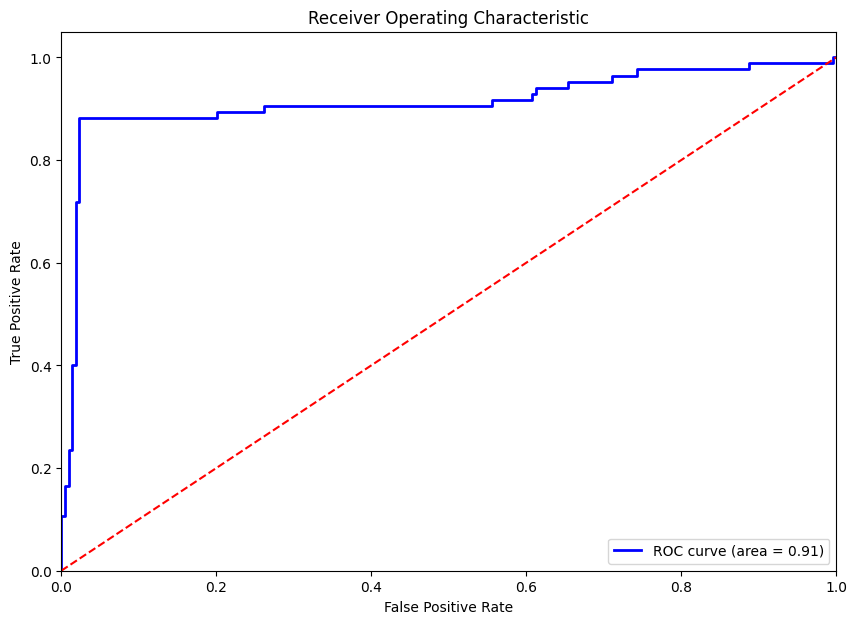

In [1705]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification




model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)


y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe 1


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [1706]:
comparison_df = pd.DataFrame({
    'Real_Class': y_test.reset_index(drop=True), 
    'Predicted_Class': pd.Series(y_pred.flatten())
})

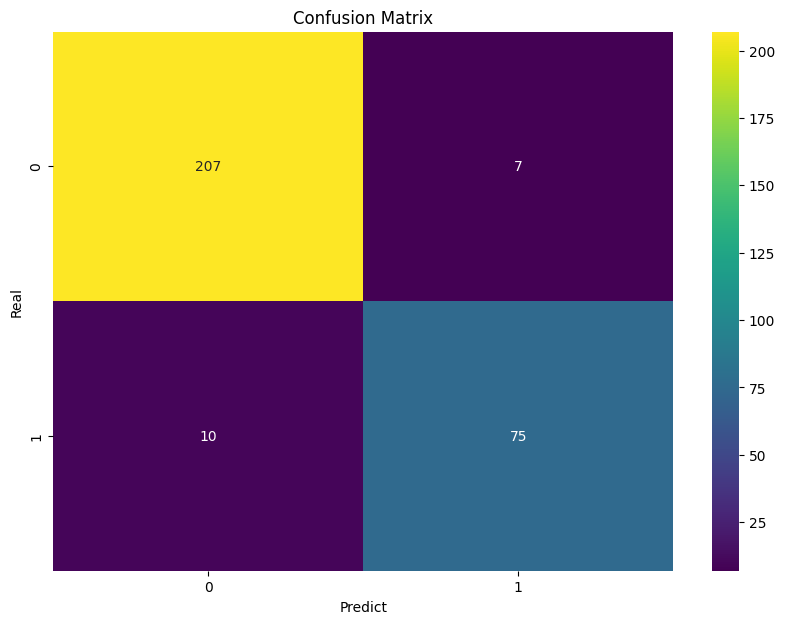

In [1707]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

In [1708]:
comparison_df = comparison_df.sample(20)
comparison_df.head(20)

,Real_Class,Predicted_Class
236,0,0
14,0,0
157,0,0
68,0,0
292,0,0
46,0,0
139,0,0
72,0,0
0,0,0
55,0,0


In [1709]:
def error(df):
    df['Correct'] = df.apply(lambda row: 1 if row['Real_Class'] == row['Predicted_Class'] else 0, axis=1)
    return df.head(20)
    
error(comparison_df)   

,Real_Class,Predicted_Class,Correct
236,0,0,1
14,0,0,1
157,0,0,1
68,0,0,1
292,0,0,1
46,0,0,1
139,0,0,1
72,0,0,1
0,0,0,1
55,0,0,1


In [1710]:
comparison_df['Correct'].value_counts(normalize = True)


Correct
1    1.0
Name: proportion, dtype: float64

The prediction was successful, but let's try to eliminate some columns to intent making it better. If feature is bellow 5, it'll be eliminated

Learning rate set to 0.011113
0:	learn: 0.6801958	total: 1.77ms	remaining: 1.77s
1:	learn: 0.6679346	total: 3.78ms	remaining: 1.89s
2:	learn: 0.6534101	total: 5.87ms	remaining: 1.95s
3:	learn: 0.6417740	total: 8.9ms	remaining: 2.21s
4:	learn: 0.6297106	total: 11.9ms	remaining: 2.36s
5:	learn: 0.6193252	total: 14.3ms	remaining: 2.37s
6:	learn: 0.6108134	total: 16.2ms	remaining: 2.3s
7:	learn: 0.6023150	total: 17.8ms	remaining: 2.21s
8:	learn: 0.5939893	total: 19.8ms	remaining: 2.17s
9:	learn: 0.5850130	total: 21.3ms	remaining: 2.11s
10:	learn: 0.5763545	total: 23.8ms	remaining: 2.14s
11:	learn: 0.5673833	total: 26ms	remaining: 2.14s
12:	learn: 0.5604349	total: 28ms	remaining: 2.13s
13:	learn: 0.5536842	total: 29.8ms	remaining: 2.1s
14:	learn: 0.5466928	total: 31.3ms	remaining: 2.06s
15:	learn: 0.5389841	total: 32.8ms	remaining: 2.02s
16:	learn: 0.5300732	total: 34.5ms	remaining: 2s
17:	learn: 0.5231094	total: 36.6ms	remaining: 2s
18:	learn: 0.5158766	total: 38.7ms	remaining: 2s
19:	lear

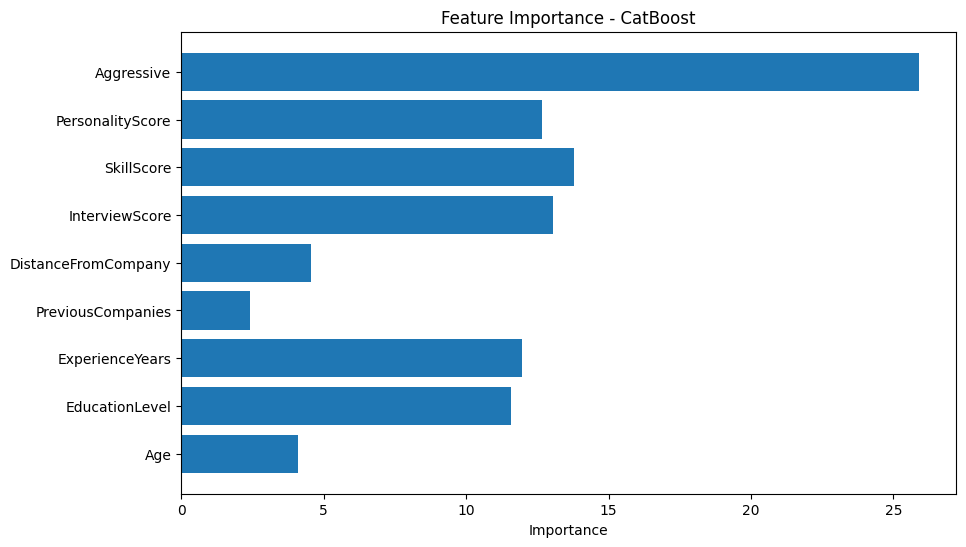

Removing feature: Age
Learning rate set to 0.011113
0:	learn: 0.6875433	total: 1.42ms	remaining: 1.42s
1:	learn: 0.6724417	total: 4.64ms	remaining: 2.31s
2:	learn: 0.6601488	total: 6.24ms	remaining: 2.07s
3:	learn: 0.6494276	total: 7.77ms	remaining: 1.94s
4:	learn: 0.6404105	total: 9.56ms	remaining: 1.9s
5:	learn: 0.6309537	total: 14.9ms	remaining: 2.47s
6:	learn: 0.6215660	total: 16.7ms	remaining: 2.37s
7:	learn: 0.6097117	total: 19.4ms	remaining: 2.4s
8:	learn: 0.6022670	total: 20.9ms	remaining: 2.3s
9:	learn: 0.5936750	total: 22.5ms	remaining: 2.23s
10:	learn: 0.5833403	total: 24.9ms	remaining: 2.24s
11:	learn: 0.5726389	total: 28.6ms	remaining: 2.36s
12:	learn: 0.5657886	total: 30.5ms	remaining: 2.31s
13:	learn: 0.5568081	total: 32.7ms	remaining: 2.3s
14:	learn: 0.5486182	total: 34.3ms	remaining: 2.25s
15:	learn: 0.5411073	total: 35.8ms	remaining: 2.2s
16:	learn: 0.5361102	total: 37.3ms	remaining: 2.15s
17:	learn: 0.5280159	total: 38.9ms	remaining: 2.12s
18:	learn: 0.5182598	total:

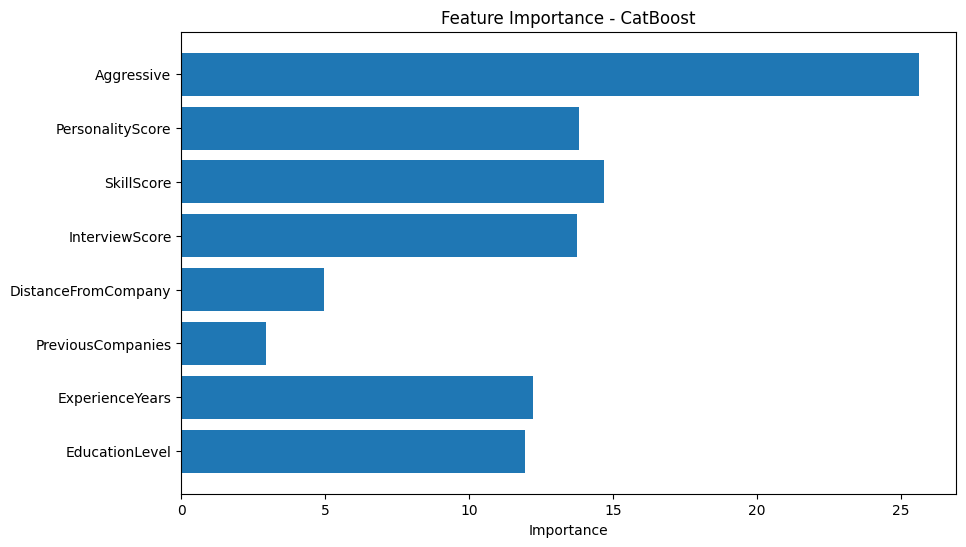

Removing feature: PreviousCompanies
Learning rate set to 0.011113
0:	learn: 0.6843103	total: 2.26ms	remaining: 2.26s
1:	learn: 0.6718466	total: 4.69ms	remaining: 2.34s
2:	learn: 0.6616753	total: 6.53ms	remaining: 2.17s
3:	learn: 0.6519158	total: 8.42ms	remaining: 2.1s
4:	learn: 0.6388652	total: 10.2ms	remaining: 2.03s
5:	learn: 0.6300532	total: 12.1ms	remaining: 2.01s
6:	learn: 0.6204947	total: 14ms	remaining: 1.99s
7:	learn: 0.6126572	total: 16.5ms	remaining: 2.04s
8:	learn: 0.6021492	total: 18.8ms	remaining: 2.06s
9:	learn: 0.5901555	total: 20.3ms	remaining: 2.01s
10:	learn: 0.5805375	total: 21.7ms	remaining: 1.96s
11:	learn: 0.5705224	total: 23.2ms	remaining: 1.91s
12:	learn: 0.5627335	total: 24.7ms	remaining: 1.88s
13:	learn: 0.5572228	total: 26.4ms	remaining: 1.86s
14:	learn: 0.5495275	total: 28ms	remaining: 1.84s
15:	learn: 0.5421841	total: 29.9ms	remaining: 1.84s
16:	learn: 0.5357606	total: 32.5ms	remaining: 1.88s
17:	learn: 0.5275428	total: 34.8ms	remaining: 1.9s
18:	learn: 0.5

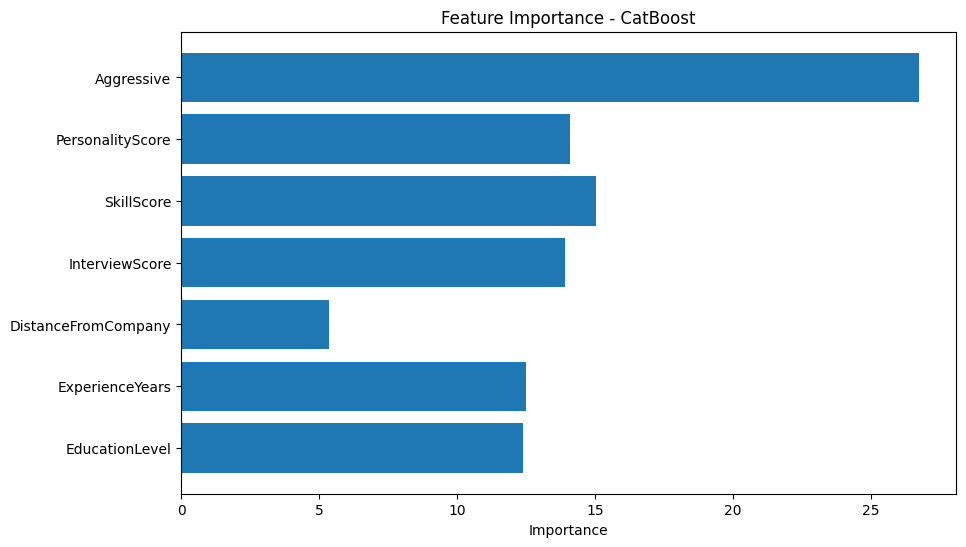

In [1711]:

features_to_remove = []
feature_names = df.columns[:-1].tolist()  


for _ in range(3):  
    
    X = df.drop('HiringDecision', axis=1)  
    y = df['HiringDecision']                

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = CatBoostClassifier()
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    
    importance = model.get_feature_importance()
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance - CatBoost')
    plt.show()

    
    low_importance_features = importance_df[importance_df['Importance'] < 5]['Feature'].tolist()
    if low_importance_features:
        feature_to_remove = low_importance_features[0]  
        features_to_remove.append(feature_to_remove)
        df = df.drop(feature_to_remove, axis=1)  
        feature_names.remove(feature_to_remove)  
        print(f'Removing feature: {feature_to_remove}')
    else:
        
        break  





So, the next step will be deploy in the near future. It won't need many features to archive an good model: aggresive, personalityScore, SkillScore, InterviewScore, DistanceFromCompany, Experience Years and Education Level are enought.

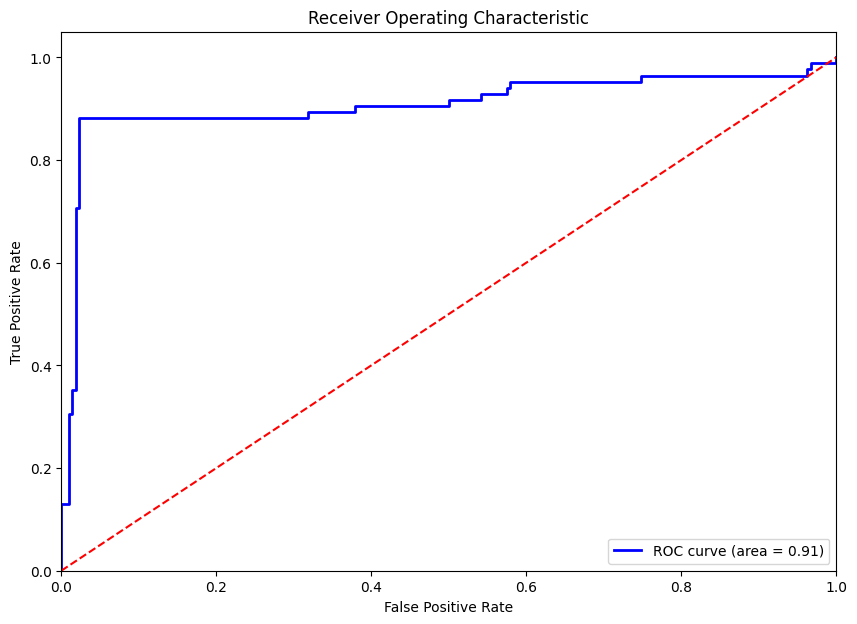

In [1712]:



y_probs = model.predict_proba(X_test)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()